In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()

In [81]:
pd.read_csv('/content/milk_production.csv')

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [82]:
df=pd.read_csv('/content/milk_production.csv',index_col='Date',parse_dates=True)

In [83]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


<Axes: xlabel='Date'>

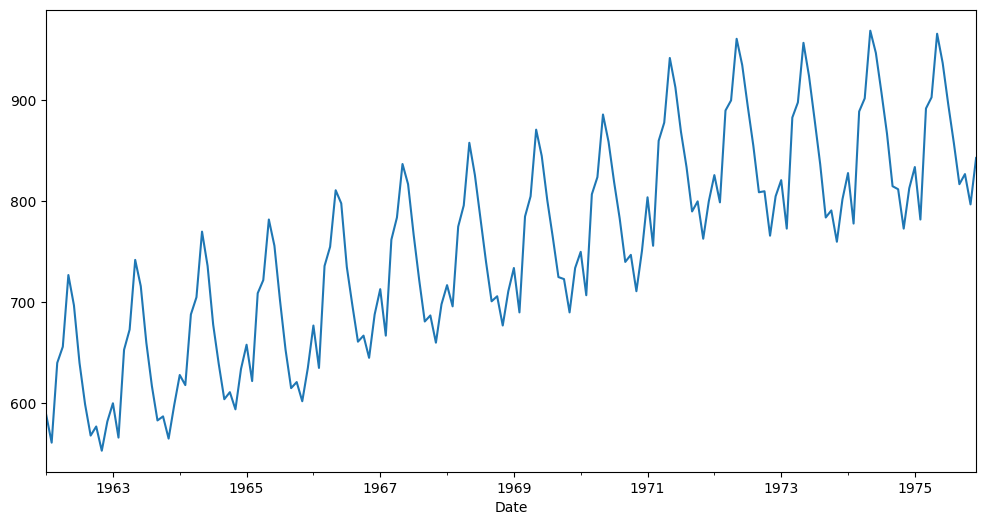

In [85]:
df['Production'].plot(figsize=(12,6))

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

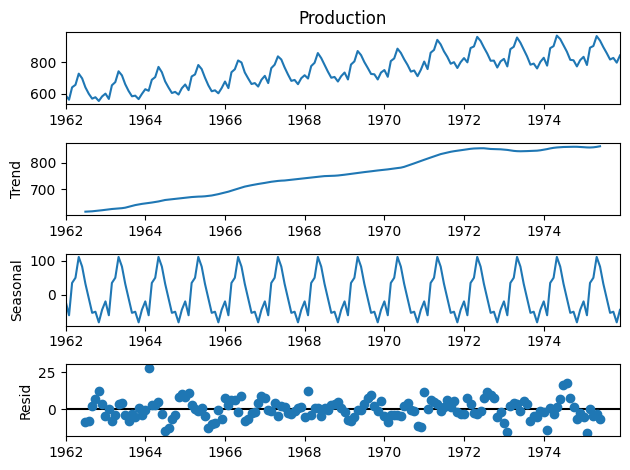

In [87]:
plot = seasonal_decompose(df['Production'])
plot.plot();

**Here we can see there is a seasonality in the production rate as well as linear increasing of production with time.**

**The adfuller function is used to perform the Augmented Dickey-Fuller test, it helps in determining whether a time series is stationary or not.**

In [88]:
result = adfuller(df['Production'])

In [89]:
print('ADF:-->',result[0])
print('P-value:-->',result[1])
print('Num of lags:-->',result[2])
print('No of observation used for ADF regression and critical value calculation:-->',result[3])

ADF:--> -1.3038115874221308
P-value:--> 0.6274267086030311
Num of lags:--> 13
No of observation used for ADF regression and critical value calculation:--> 154


**Here p-value is greater than 0.05, so there is no sufficient evidence to reject the null hypo. i.e 'The data is not stationary'. so we have to accept that our data has seasonality trend**

**Using RNN model**

In [90]:
len(df)

168

In [91]:
train=df[:-12]
test=df[-12:]

In [92]:
len(train),len(test)

(156, 12)

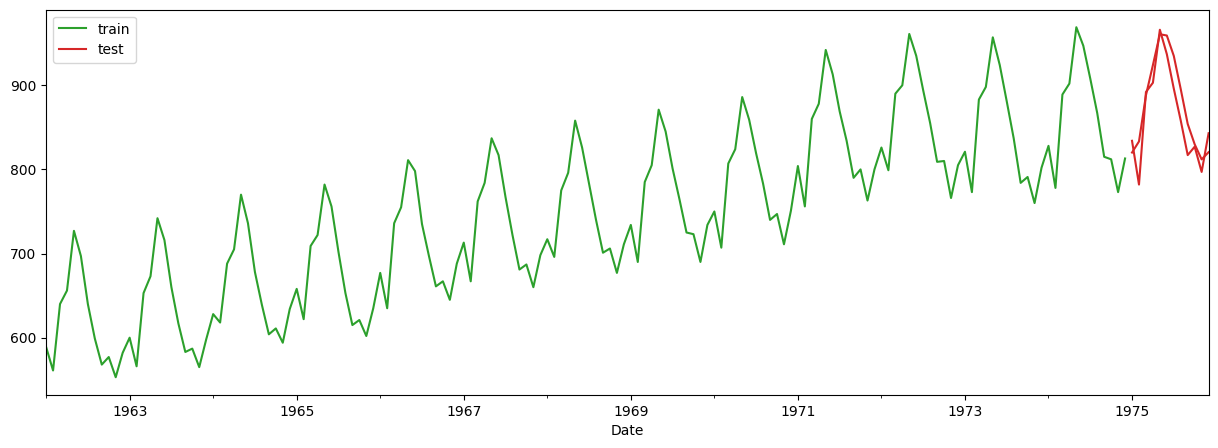

In [153]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Train_data',color=color[2])
test.plot(ax=ax,label= 'test_data',color=color[3])
ax.legend(['train','test'])
plt.show()

In [93]:
train.tail()

,Production
Date,
1974-08-01,867
1974-09-01,815
1974-10-01,812
1974-11-01,773
1974-12-01,813


In [94]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [97]:
train_scaled[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [98]:
from keras.preprocessing.sequence import TimeseriesGenerator

**The TimeseriesGenerator class in Keras can be used for training and validation in sequence-based models like recurrent neural networks (RNNs) and other types of neural networks. It helps in managing the data preparation process for time series forecasting and sequence prediction tasks.**

In [99]:
n_input = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

In [100]:
for i in range(1,6):
  x,y = generator[i]
  print(x,y)
  print('-'*20)

[[[0.01923077]
  [0.20913462]
  [0.24759615]
  [0.41826923]
  [0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]
  [0.11298077]]] [[0.03125]]
--------------------
[[[0.20913462]
  [0.24759615]
  [0.41826923]
  [0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]
  [0.11298077]
  [0.03125   ]]] [[0.24038462]]
--------------------
[[[0.24759615]
  [0.41826923]
  [0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]
  [0.11298077]
  [0.03125   ]
  [0.24038462]]] [[0.28846154]]
--------------------
[[[0.41826923]
  [0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]
  [0.11298077]
  [0.03125   ]
  [0.24038462]
  [0.28846154]]] [[0.45432692]]
--------------------
[[[0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]
  [0.11298077]
  [0.03125 

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [102]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 8ms/step - loss: 0.0523
Epoch 2/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0230
Epoch 3/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0174
Epoch 4/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0125
Epoch 5/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0089
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0101
Epoch 7/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0058
Epoch 8/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch 9/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0048
Epoch 10/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0053
Epoch 11/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 12/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0041
Epoch 13/50
144/144 [=

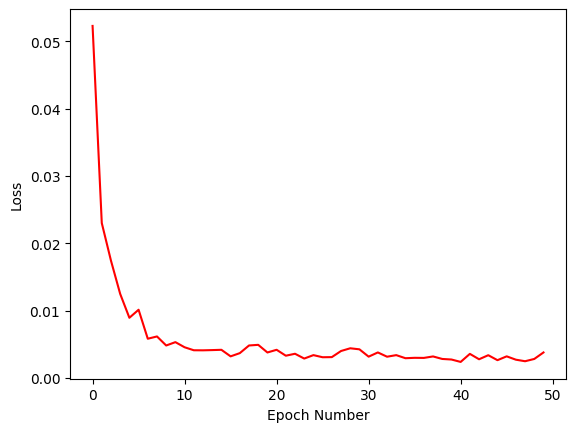

In [105]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(model.history.history['loss'],color='red')

In [106]:
last_train_batch = train_scaled[-12:]

In [107]:
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [108]:
last_train_batch = last_train_batch.reshape(1, n_input, 1)

In [109]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [110]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 198ms/step


array([[0.64192486]], dtype=float32)

In [111]:
test_scaled[0]

array([0.67548077])

In [112]:
test_predictions = []

first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, 1))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [113]:
true_predictions = scaler.inverse_transform(test_predictions)

In [114]:
test['Prediction'] = true_predictions

<ipython-input-114-e52fcd9aa14e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = true_predictions


In [115]:
test.head()

,Production,Prediction
Date,,
1975-01-01,834,820.040741
1975-02-01,782,833.237444
1975-03-01,892,888.119478
1975-04-01,903,924.024921
1975-05-01,966,960.646931


<Axes: xlabel='Date'>

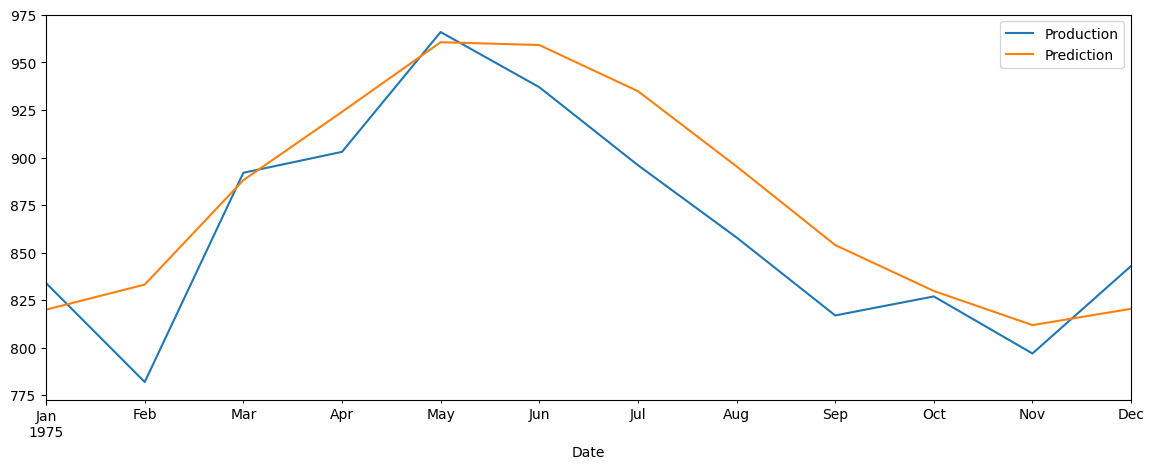

In [116]:
test.plot(figsize=(14,5))

**Using ML model**

<Axes: title={'center': 'Milk_Production'}, xlabel='Date'>

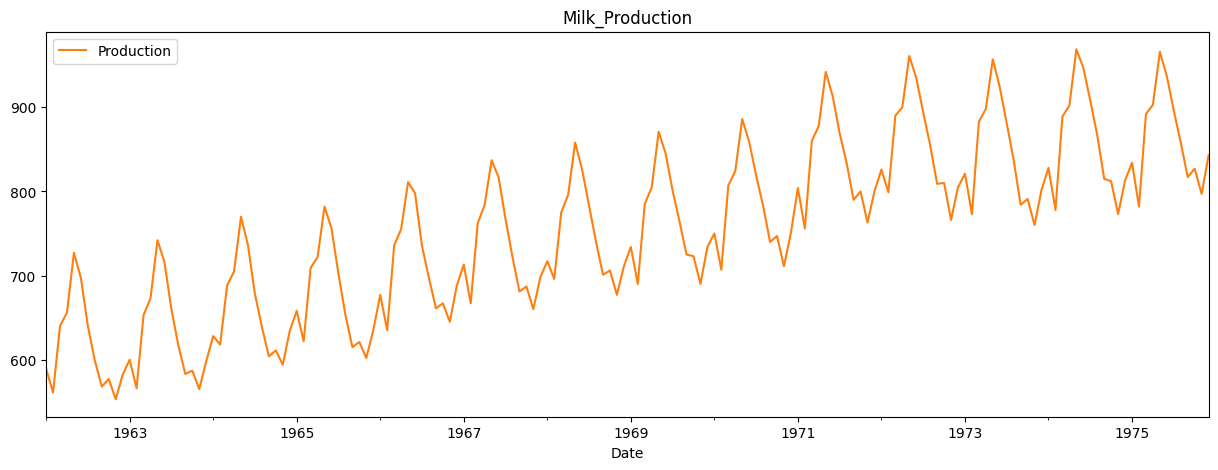

In [118]:
df.plot(figsize=(15,5),color = color[1],title='Milk_Production')

In [122]:
df['production_last_month'] = df['Production'].shift(+1)
df['production_last_2month'] = df['Production'].shift(+2)
df['production_last_3month'] = df['Production'].shift(+3)

In [123]:
df.head()

,Production,production_last_month,production_last_2month,production_last_3month
Date,,,,
1962-01-01,589,NaN,NaN,NaN
1962-02-01,561,589.0,NaN,NaN
1962-03-01,640,561.0,589.0,NaN
1962-04-01,656,640.0,561.0,589.0
1962-05-01,727,656.0,640.0,561.0


In [124]:
df = df.dropna()

In [125]:
df.head()

,Production,production_last_month,production_last_2month,production_last_3month
Date,,,,
1962-04-01,656,640.0,561.0,589.0
1962-05-01,727,656.0,640.0,561.0
1962-06-01,697,727.0,656.0,640.0
1962-07-01,640,697.0,727.0,656.0
1962-08-01,599,640.0,697.0,727.0


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [127]:
lr = LinearRegression()
rf = RandomForestRegressor()

In [128]:
x1,x2,x3,y = np.array(df['production_last_month']),np.array(df['production_last_2month']),np.array(df['production_last_3month']),np.array(df['Production'])

In [129]:
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

In [134]:
x = np.concatenate((x1,x2,x3),axis=1)

In [140]:
x_train,x_test,y_train,y_test = x[:-30],x[-30:],y[:-30],y[-30:]

In [141]:
len(x_train),len(x_test)

(135, 30)

In [142]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)

<ipython-input-142-e3885bce71f5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
train_data.plot(ax=ax,label='Train_data',color=color[2])
test_data.plot(ax=ax,label= 'test_data',color=color[3])
ax.axvline('1974-01-01',color=color[0],ls='--')
ax.legend(['train','test'])
plt.show()

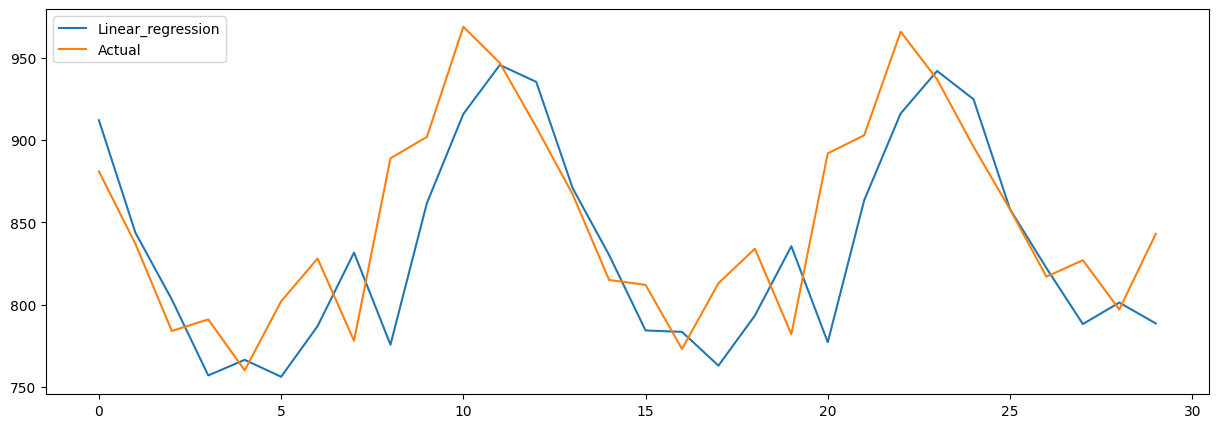

In [149]:
pred_lr = lr.predict(x_test)
plt.figure(figsize=(15,5))
plt.plot(pred_lr,label = 'Linear_regression')
plt.plot(y_test,label = 'Actual')
plt.legend(loc='upper left')
plt.show()

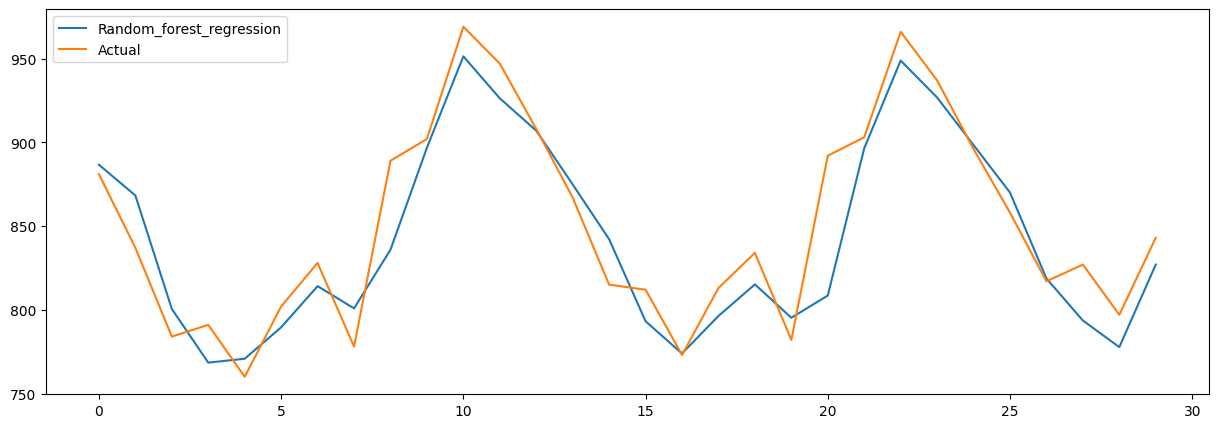

In [148]:
pred_rf = rf.predict(x_test)
plt.figure(figsize=(15,5))
plt.plot(pred_rf,label = 'Random_forest_regression')
plt.plot(y_test,label = 'Actual')
plt.legend(loc='upper left')
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [151]:
rmse_lr = sqrt(mean_squared_error(pred_lr,y_test))
rmse_rf = sqrt(mean_squared_error(pred_rf,y_test))

In [152]:
print('MSE for Linear regression-->',rmse_lr)
print('MSE for Random forest regressor-->',rmse_rf)

MSE for Linear regression--> 43.99093305878599
MSE for Random forest regressor--> 24.24863570045402
